In [3]:
from sklearn.cluster import KMeans

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [11]:
milk = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\milk.csv", index_col = 0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [13]:
milk_scl = StandardScaler().set_output(transform = 'pandas').fit_transform(milk)

In [37]:
a = []
for i in range(2, 7):
    clust = KMeans(n_clusters = i, random_state = 24)
    clust.fit(milk_scl)
    score = silhouette_score(milk_scl, clust.labels_)
    a.append([i, score])
pa = pd.DataFrame(a, columns = ['number', 'score'])
pa.loc[pa['score'].idxmax()]

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\s

number    2.000000
score     0.525851
Name: 0, dtype: float64

In [39]:
pa

,number,score
0,2,0.525851
1,3,0.487576
2,4,0.443481
3,5,0.394231
4,6,0.394853


In [43]:
clust = KMeans(n_clusters = 3)
clust.fit(milk_scl)
milk_scl['clust'] = clust.labels_
milk_scl

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,water,protein,fat,lactose,ash,clust
Animal,,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554,2
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945,2
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249,2
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467,2
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988,2
CAMEL,0.757707,-0.757806,-0.670322,0.372182,-0.309730,2
BISON,0.694008,-0.394551,-0.835283,0.873626,0.074400,2
BUFFALO,0.311810,-0.087181,-0.233662,0.316466,-0.168208,0
GUINEA PIG,0.295885,0.331959,-0.301587,-0.797852,-0.026687,0


In [47]:
milk_scl.groupby('clust').mean()

,water,protein,fat,lactose,ash
clust,,,,,
0,0.152561,0.401816,-0.261560,-0.115332,0.256356
1,-1.473107,1.282012,1.445055,-1.420013,1.011137
2,0.692560,-0.991509,-0.597987,0.858430,-0.737970


## RFM

In [60]:
rfm = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Cases\\Recency Frequency Monetary\\rfm_data_customer.csv", index_col = 0)


In [65]:
rfm.drop("most_recent_visit", axis = 1, inplace = True)

In [67]:
rfm_scl = StandardScaler().set_output(transform = 'pandas').fit_transform(rfm)

In [75]:
for i in range(2, 6):
    clust = KMeans(n_clusters= i)
    clust.fit(rfm_scl)
    score = silhouette_score(rfm_scl, clust.labels_)
    a.append([i, score])
scores = pd.DataFrame(a, columns = ['#clusters', 'score'])

In [108]:
clust = KMeans(n_clusters = 3)
clust.fit(rfm_scl)
silhouette_score(rfm_scl, clust.labels_)

0.37094879444539725

In [109]:
scores.loc[scores['score'].idxmax()]

#clusters    2.000000
score        0.525851
Name: 0, dtype: float64

In [110]:
clust.labels_

array([1, 0, 1, ..., 1, 1, 0])

In [111]:
import seaborn as sns

In [112]:
df_scaled = rfm_scl.copy()
df_scaled['clusters'] = clust.labels_
df_scaled.groupby('clusters').mean()

,revenue,number_of_orders,recency_days
clusters,,,
0,0.988142,0.986452,-0.367775
1,-0.542618,-0.510868,-0.346546
2,-0.706847,-0.791545,1.791854


# plots

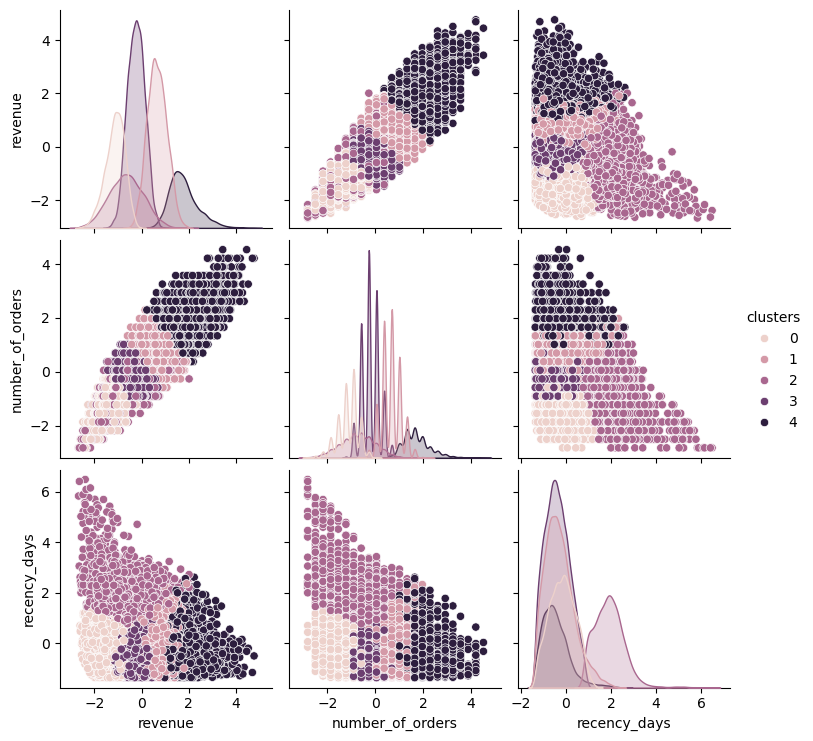

In [95]:
sns.pairplot(df_scaled, hue = 'clusters')

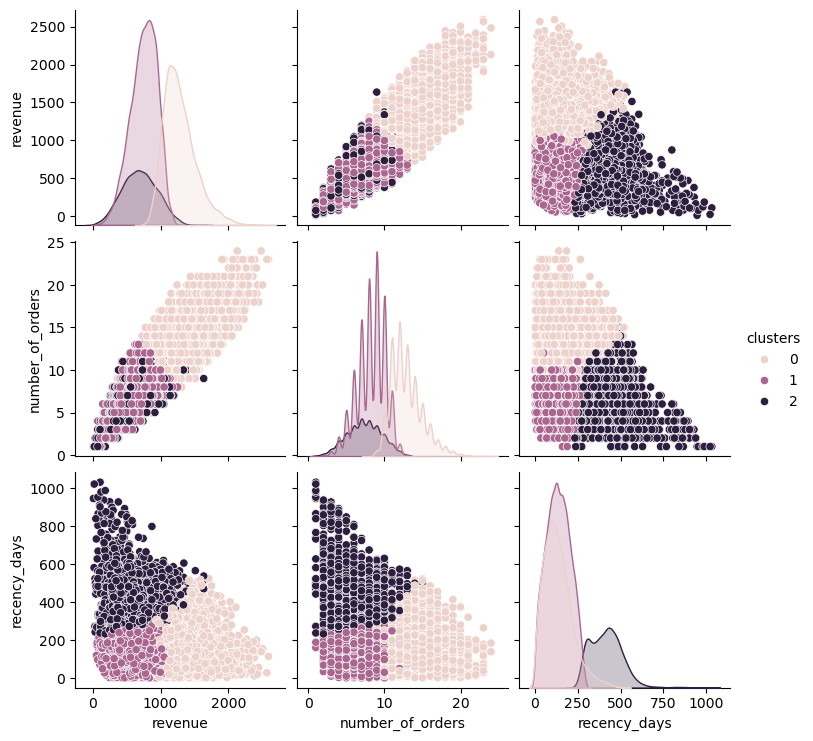

In [118]:
df_new = rfm.copy()
df_new['clusters'] = clust.labels_
sns.pairplot(df_new, hue = 'clusters')

In [119]:
df_new.groupby('clusters').mean()

,revenue,number_of_orders,recency_days
clusters,,,
0,1281.859302,12.915648,133.197314
1,749.886899,8.233238,135.980410
2,692.813725,7.355505,416.321116
